In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
data = pd.read_csv("Market_Basket_Optimisation.csv",header=None)

In [10]:
transactions = data.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

In [11]:
encoder = TransactionEncoder()
encoded_data = encoder.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(encoded_data, columns=encoder.columns_)

In [12]:
# with apriori algorthim
apriori_support_values = apriori(df_encoded, min_support=0.01, use_colnames=True, verbose = 1)
apriori_support_values.sort_values(by= "support",ascending=False)


apriori_rules = association_rules(apriori_support_values, metric= "confidence", min_threshold = 0.1,num_itemsets=3)
apriori_rules = apriori_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
apriori_rules

Processing 84 combinations | Sampling itemset size 4 3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
279,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
301,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725
265,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,1.0,0.005434,1.447937,0.508837,0.043640,0.309362,0.259925
292,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,1.0,0.005440,1.434136,0.503555,0.044102,0.302716,0.257674
232,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,1.0,0.003614,1.016889,0.194486,0.081009,0.016609,0.191083
205,(milk),(low fat yogurt),0.129583,0.076523,0.013198,0.101852,1.330994,1.0,0.003282,1.028201,0.285704,0.068417,0.027428,0.137163
285,(milk),"(eggs, mineral water)",0.129583,0.050927,0.013065,0.100823,1.979774,1.0,0.006466,1.055491,0.568568,0.078025,0.052574,0.178684
207,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,1.0,0.005756,1.026851,0.314943,0.082493,0.026149,0.207130


In [13]:
# with fpgrowth algorthim
fpgrowth_support_values = fpgrowth(df_encoded, min_support=0.01, use_colnames=True, verbose = 1)
fpgrowth_support_values.sort_values(by= "support",ascending=False)

fpgrowth_rules = association_rules(fpgrowth_support_values, metric= "confidence", min_threshold = 0.1,num_itemsets=3)
fpgrowth_rules = fpgrowth_rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
fpgrowth_rules

75 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (mineral water)
5 itemset(s) from tree conditioned on items (green tea)
0 itemset(s) from tree conditioned on items (green tea, mineral water)
0 itemset(s) from tree conditioned on items (green tea, spaghetti)
0 itemset(s) from tree conditioned on items (green tea, french fries)
0 itemset(s) from tree conditioned on items (green tea, chocolate)
0 itemset(s) from tree conditioned on items (green tea, eggs)
7 itemset(s) from tree conditioned on items (low fat yogurt)
0 itemset(s) from tree conditioned on items (low fat yogurt, mineral water)
0 itemset(s) from tree conditioned on items (low fat yogurt, chocolate)
0 itemset(s) from tree conditioned on items (low fat yogurt, french fries)
0 itemset(s) from tree conditioned on items (low fat yogurt, eggs)
0 itemset(s) from tree conditioned on items (low fat yogurt, spaghetti)
0 itemset(s) from tree conditioned on items (low fat yogurt, milk)
0 itemset

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
286,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
278,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725
282,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,1.0,0.005434,1.447937,0.508837,0.043640,0.309362,0.259925
174,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,1.0,0.005440,1.434136,0.503555,0.044102,0.302716,0.257674
145,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,1.0,0.011020,1.401255,0.503221,0.086760,0.286354,0.276610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,1.0,0.003614,1.016889,0.194486,0.081009,0.016609,0.191083
17,(milk),(low fat yogurt),0.129583,0.076523,0.013198,0.101852,1.330994,1.0,0.003282,1.028201,0.285704,0.068417,0.027428,0.137163
126,(milk),"(eggs, mineral water)",0.129583,0.050927,0.013065,0.100823,1.979774,1.0,0.006466,1.055491,0.568568,0.078025,0.052574,0.178684
11,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,1.0,0.005756,1.026851,0.314943,0.082493,0.026149,0.207130


C:\Users\A7med\AppData\Local\Temp\ipykernel_12376\862015740.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='algorithm', y='support', data=combined_rules, palette='Set2')
C:\Users\A7med\AppData\Local\Temp\ipykernel_12376\862015740.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='algorithm', y='confidence', data=combined_rules, palette='Set2')
C:\Users\A7med\AppData\Local\Temp\ipykernel_12376\862015740.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='algorithm', y='lift', data=combined_rules, palette='Set2')
C:\Users\A7me

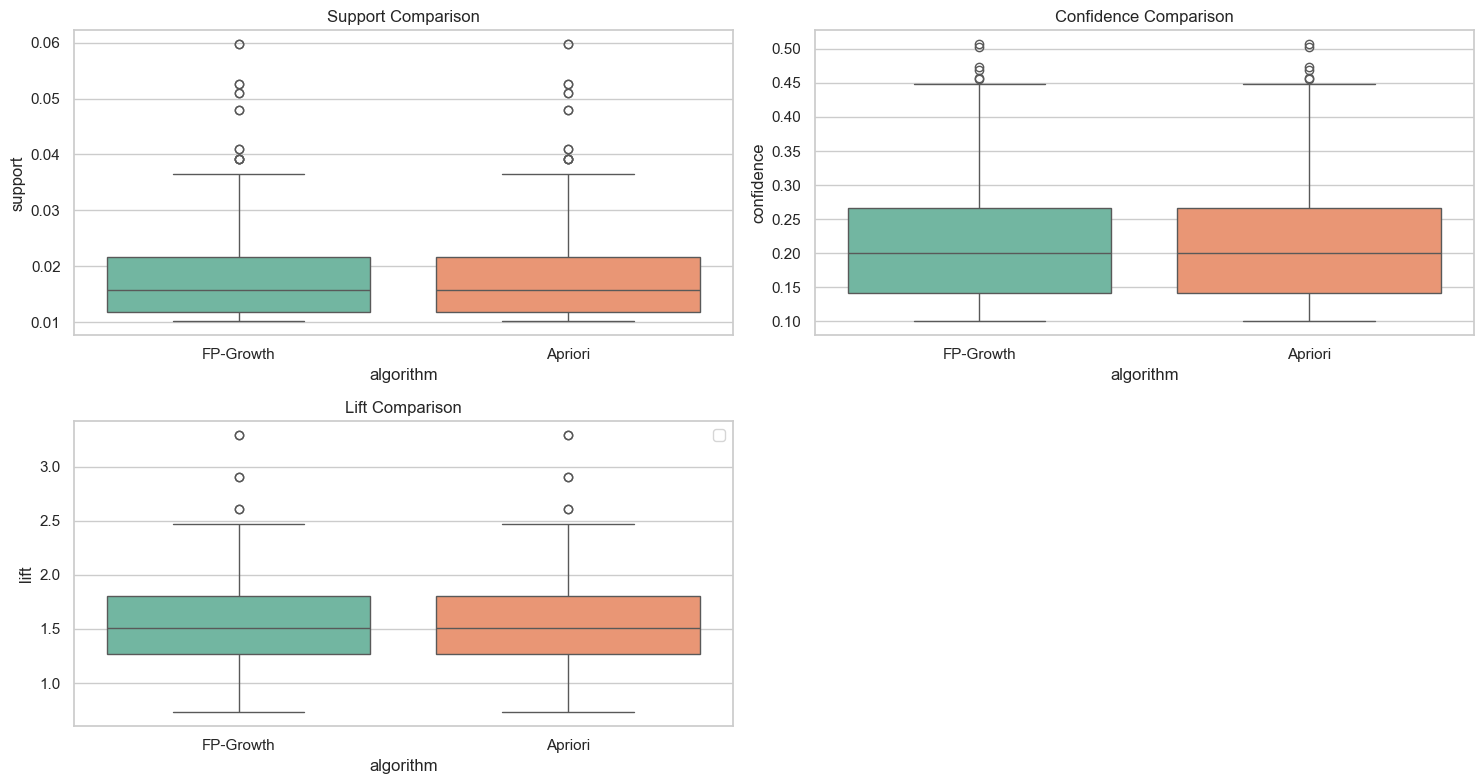

In [14]:
fpgrowth_rules['algorithm'] = 'FP-Growth'
apriori_rules['algorithm'] = 'Apriori'

combined_rules = pd.concat([
    fpgrowth_rules[['support', 'confidence', 'lift', 'algorithm']],
    apriori_rules[['support', 'confidence', 'lift', 'algorithm']]
])

sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Plot support comparison
plt.subplot(2, 2, 1)
sns.boxplot(x='algorithm', y='support', data=combined_rules, palette='Set2')
plt.title('Support Comparison')

# Plot confidence comparison
plt.subplot(2, 2, 2)
sns.boxplot(x='algorithm', y='confidence', data=combined_rules, palette='Set2')
plt.title('Confidence Comparison')

# Plot lift comparison
plt.subplot(2, 2, 3)
sns.boxplot(x='algorithm', y='lift', data=combined_rules, palette='Set2')
plt.title('Lift Comparison')

plt.tight_layout()
plt.legend()
plt.show()

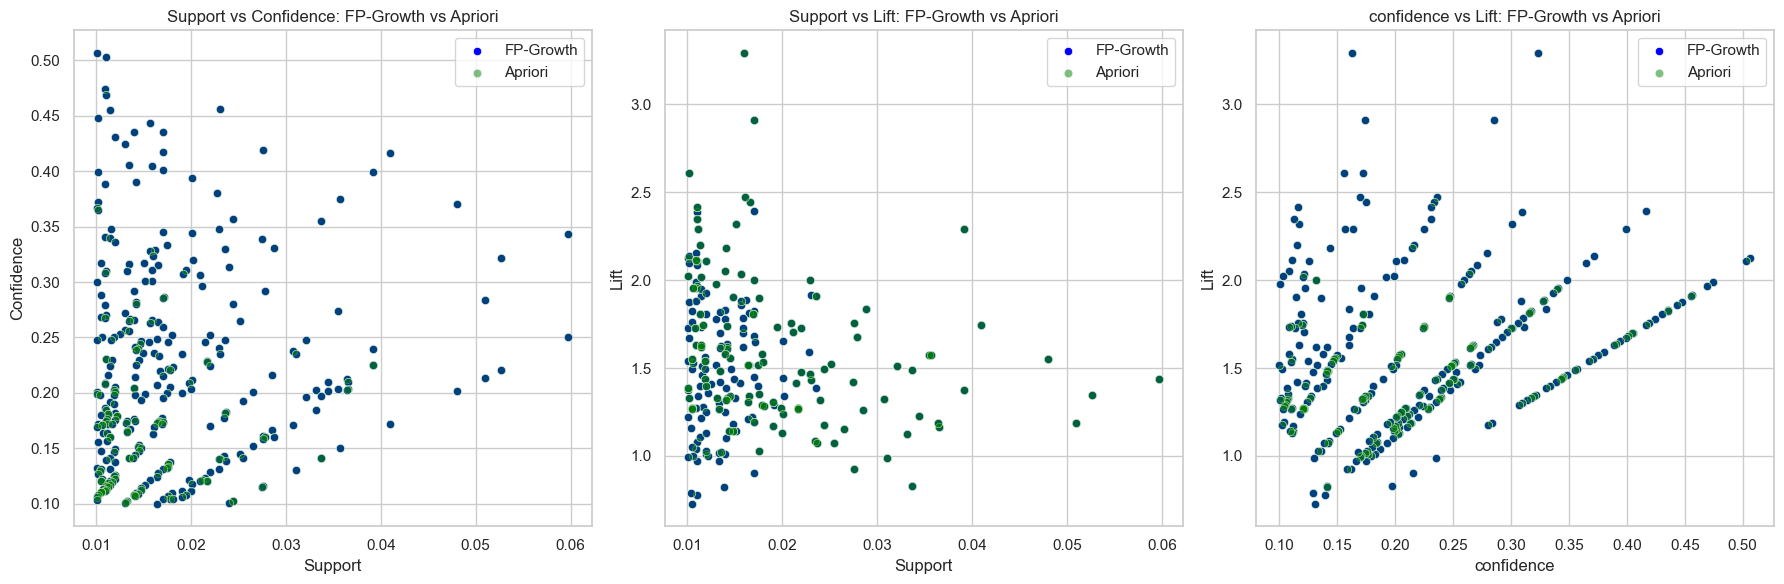

In [23]:
plt.figure(figsize=(18, 6))

# Scatter Plot for Support vs Confidence
plt.subplot(1, 3, 1)
sns.scatterplot(x='support', y='confidence', data=fpgrowth_rules, label='FP-Growth', color='blue', alpha=1)
sns.scatterplot(x='support', y='confidence', data=apriori_rules, label='Apriori', color='green', alpha=0.5)
plt.title('Support vs Confidence: FP-Growth vs Apriori')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend()

# Scatter Plot for Support vs Lift
plt.subplot(1, 3, 2)
sns.scatterplot(x='support', y='lift', data=fpgrowth_rules, label='FP-Growth', color='blue', alpha=1)
sns.scatterplot(x='support', y='lift', data=apriori_rules, label='Apriori', color='green', alpha=0.5)
plt.title('Support vs Lift: FP-Growth vs Apriori')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.legend()

# Step 2: Scatter Plot for Support vs Lift
plt.subplot(1, 3, 3)
sns.scatterplot(x='confidence', y='lift', data=fpgrowth_rules, label='FP-Growth', color='blue', alpha=1)
sns.scatterplot(x='confidence', y='lift', data=apriori_rules, label='Apriori', color='green', alpha=0.5)
plt.title('confidence vs Lift: FP-Growth vs Apriori')
plt.xlabel('confidence')
plt.ylabel('Lift')
plt.legend()

plt.tight_layout()
plt.show()